In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# --- KROK 1: Generacja i przygotowanie danych ---
np.random.seed(42)
# X: wiek, BMI, aktywność, kalorie, sen
X = np.random.rand(-, 5) * [80, 40, 2, 3000, 10] 
# y: cukier, ciśnienie skurczowe, ciśnienie rozkurczowe
y = np.random.rand(1000, 3) * [200, 180, 120]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# --- KROK 2: Definicja modelu ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    BatchNormalization(), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid') 
])


# --- KROK 3: Trenowanie ---
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# --- KROK 4: Predykcja i ewaluacja ---
history = model.fit(X_scaled, y_scaled, 
                    epochs=200, 
                    batch_size=32, 
                    verbose=0)

mse_final = model.evaluate(X_scaled, y_scaled, verbose=0)
print(f"Błąd MSE: {mse_final:.6f}")

C:\Users\Dawid\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Błąd MSE: 0.032190


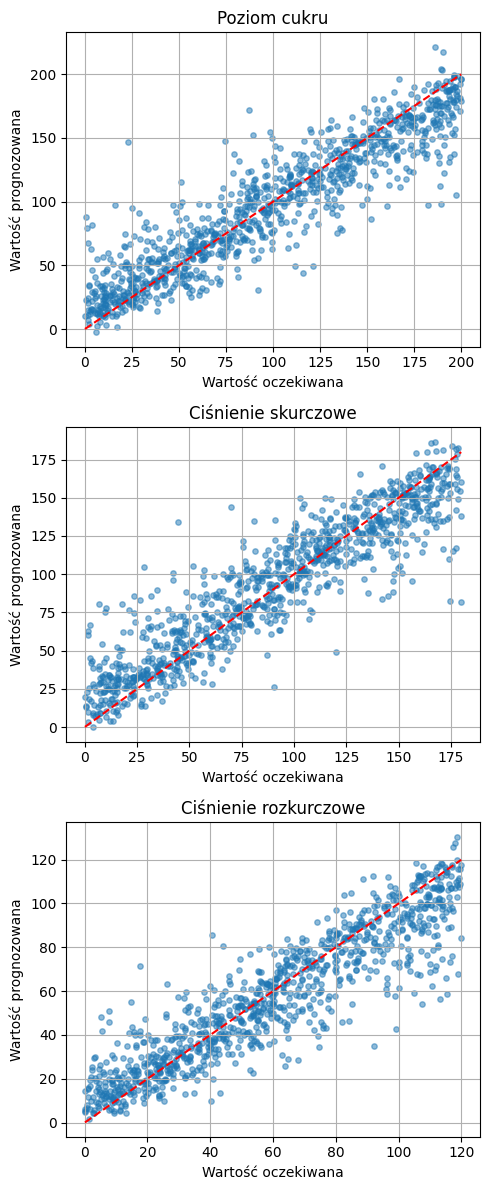

In [27]:
titles = ['Poziom cukru', 'Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']
plt.figure(figsize=(5, 12))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.scatter(y[:, i], y_pred[:, i], alpha=0.5, s=15)
    plt.plot([y[:, i].min(), y[:, i].max()], [y[:, i].min(), y[:, i].max()], 'r--')
    plt.title(titles[i])
    plt.xlabel('Wartość oczekiwana')
    plt.ylabel('Wartość prognozowana')
    plt.grid(True)

plt.tight_layout()
plt.show()